# Covid19 Prediction(Machine Lerning)

# Importing Libraries

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Importing data file

In [158]:
data = pd.read_csv('C:/Users/covid19_india.csv')
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [159]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [160]:
data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
582,583,02/04/20,9:00 AM,Tamil Nadu,-,-,6,1,234
583,584,02/04/20,9:00 AM,Telengana,-,-,1,3,96
584,585,02/04/20,9:00 AM,Uttarakhand,-,-,2,0,7
585,586,02/04/20,9:00 AM,Uttar Pradesh,-,-,14,2,113
586,587,02/04/20,9:00 AM,West Bengal,-,-,6,3,37


# Exploratory Data Analysis,Visualization and Preprocessing

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       587 non-null    int64 
 1   Date                      587 non-null    object
 2   Time                      587 non-null    object
 3   State/UnionTerritory      587 non-null    object
 4   ConfirmedIndianNational   587 non-null    object
 5   ConfirmedForeignNational  587 non-null    object
 6   Cured                     587 non-null    int64 
 7   Deaths                    587 non-null    int64 
 8   Confirmed                 587 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 41.4+ KB


In [162]:
data.shape

(587, 9)

In [163]:
data.isnull().sum() / len(df)   #checking null

Sno                         0.0
Date                        0.0
Time                        0.0
State/UnionTerritory        0.0
ConfirmedIndianNational     0.0
ConfirmedForeignNational    0.0
Cured                       0.0
Deaths                      0.0
Confirmed                   0.0
dtype: float64

In [164]:
data.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [165]:
data.describe() # checking central tendency

,Sno,Cured,Deaths,Confirmed
count,587.00000,587.000000,587.000000,587.000000
mean,294.00000,1.879046,0.499148,23.124361
std,169.59658,4.763057,1.243927,41.772297
min,1.00000,0.000000,0.000000,1.000000
25%,147.50000,0.000000,0.000000,2.000000
50%,294.00000,0.000000,0.000000,7.000000
75%,440.50000,1.500000,1.000000,27.000000
max,587.00000,42.000000,13.000000,335.000000


In [166]:
#data['Date']=pd.to_datetime(df['Date'])

In [167]:
data_latest = data[data['Date']=="2020-02-04"]  # The maximum cases until 4th February 2020 for each state.
data_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [168]:
data_latest.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [169]:
data_1= df_latest.copy()

df_Top= df2.head(10)

df_Top.style.background_gradient(cmap='Reds')

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Maharashtra,212,71,2384
Kerala,200,7,2284
Uttar Pradesh,187,4,943
Delhi,92,25,900
Karnataka,53,34,858
Tamil Nadu,35,8,822
Rajasthan,58,0,820
Telengana,19,9,751
Gujarat,15,42,625


In [170]:
data1=data.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

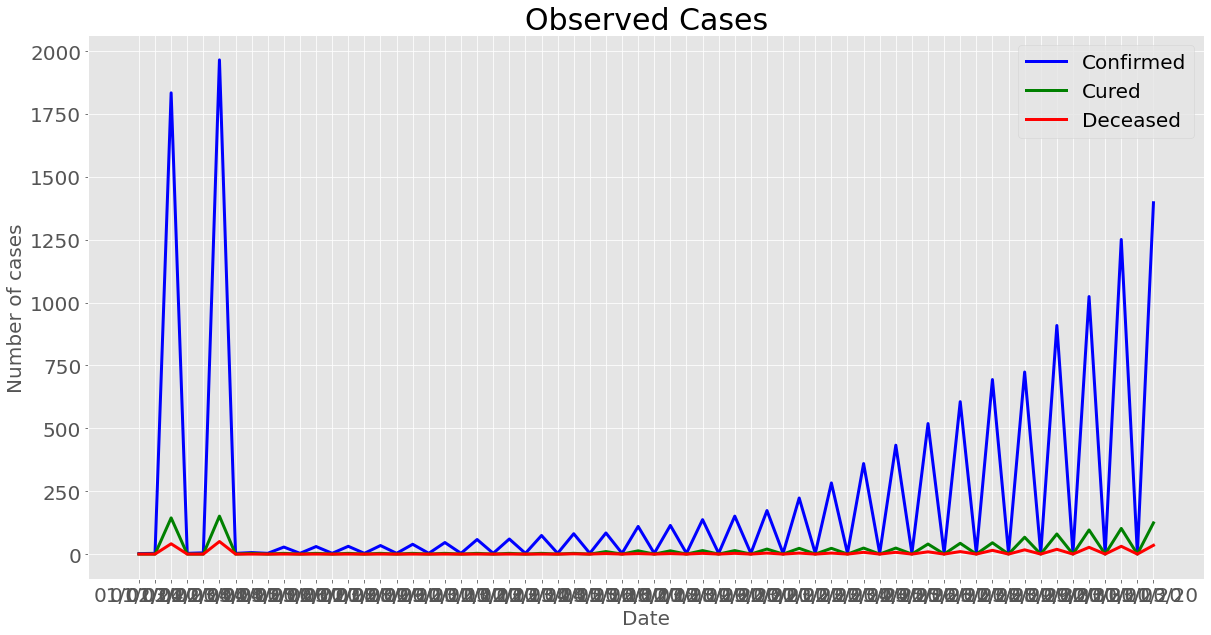

In [171]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(data1.index,data1['Confirmed'],linewidth=3,label='Confirmed',color='blue')
plt.plot(data1.index,data1['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(data1.index,data1['Deaths'],linewidth=3,label='Deceased',color='red')
plt.legend(fontsize=20)

In [172]:
data2=data.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()

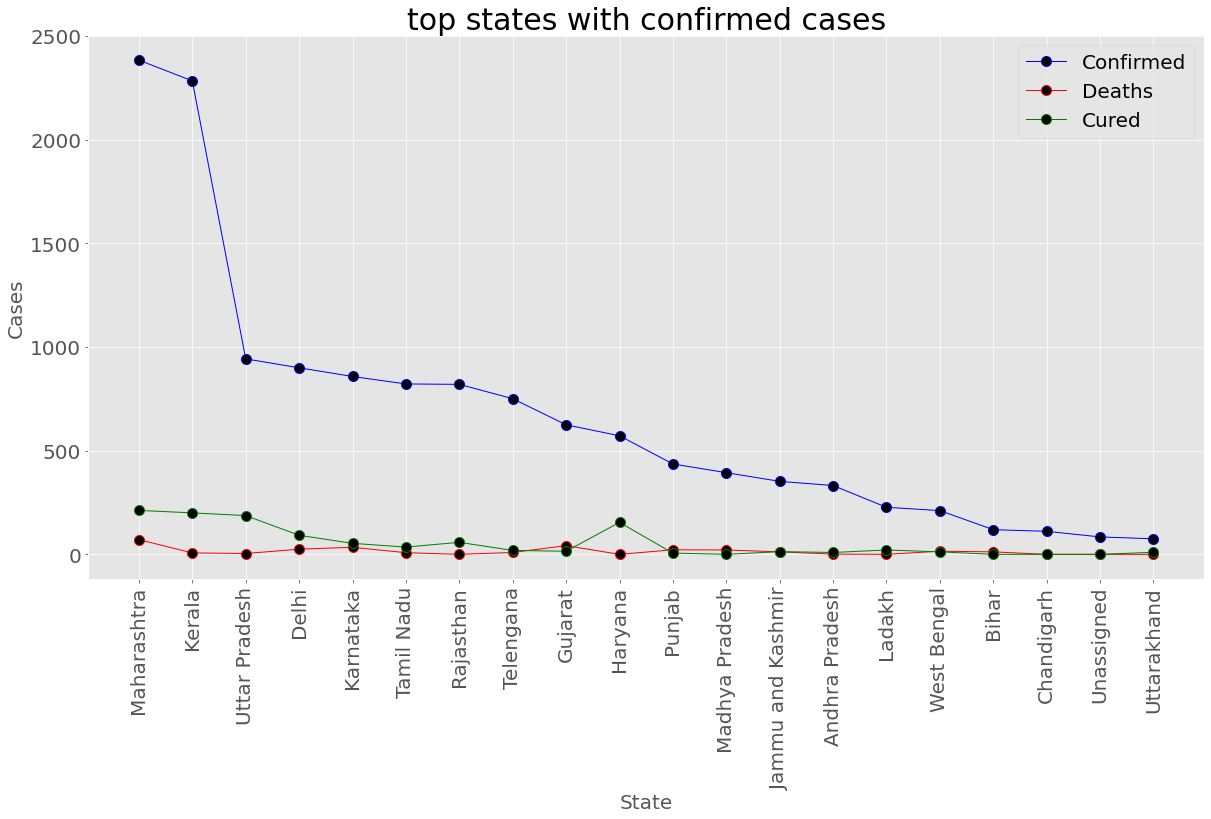

In [173]:
data2=data2.nlargest(20,'Confirmed')
plt.figure(figsize=(20,10))
plt.title('top states with confirmed cases',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.plot(data2.index,data2.Confirmed,marker='o',mfc='black',label='Confirmed',markersize=10,linewidth=1,color='blue')
plt.plot(data2.index,data2.Deaths,marker='o',mfc='black',label='Deaths',markersize=10,linewidth=1,color='red')
plt.plot(data2.index,data2.Cured,marker='o',mfc='black',label='Cured',markersize=10,linewidth=1,color='green')
plt.legend(fontsize=20)

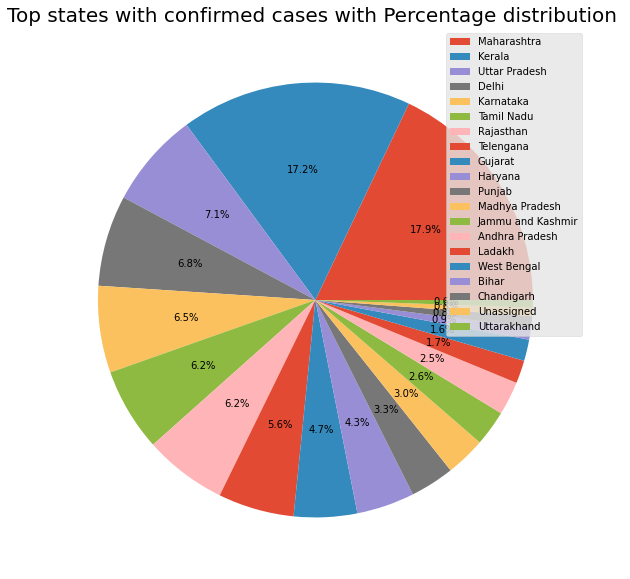

In [174]:
perc=[]
for i in data2.Confirmed:
    per=i/len(data2)
    perc.append(i)
plt.figure(figsize=(25,10))    
plt.title('Top states with confirmed cases with Percentage distribution ',fontsize=20)
plt.pie(perc,autopct='%1.1f%%')
plt.legend(data2.index,loc='upper right')

In [175]:
data["ConfirmedForeignNational"]=data['ConfirmedForeignNational'].replace('-',0,inplace=True)
data["ConfirmedIndianNational"]=data['ConfirmedIndianNational'].replace('-',0,inplace=True)

In [176]:
data.isnull().sum()

Sno                           0
Date                          0
Time                          0
State/UnionTerritory          0
ConfirmedIndianNational     587
ConfirmedForeignNational    587
Cured                         0
Deaths                        0
Confirmed                     0
dtype: int64

In [177]:
data['ConfirmedIndianNational']=data['ConfirmedIndianNational'].astype('float64')
data['ConfirmedForeignNational']=data['ConfirmedForeignNational'].astype('float64')

In [178]:
data3=data.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational']].sum()

In [179]:
data4=data3.nlargest(20,'ConfirmedIndianNational')
data5=data3.nlargest(20,'ConfirmedForeignNational')

<BarContainer object of 20 artists>

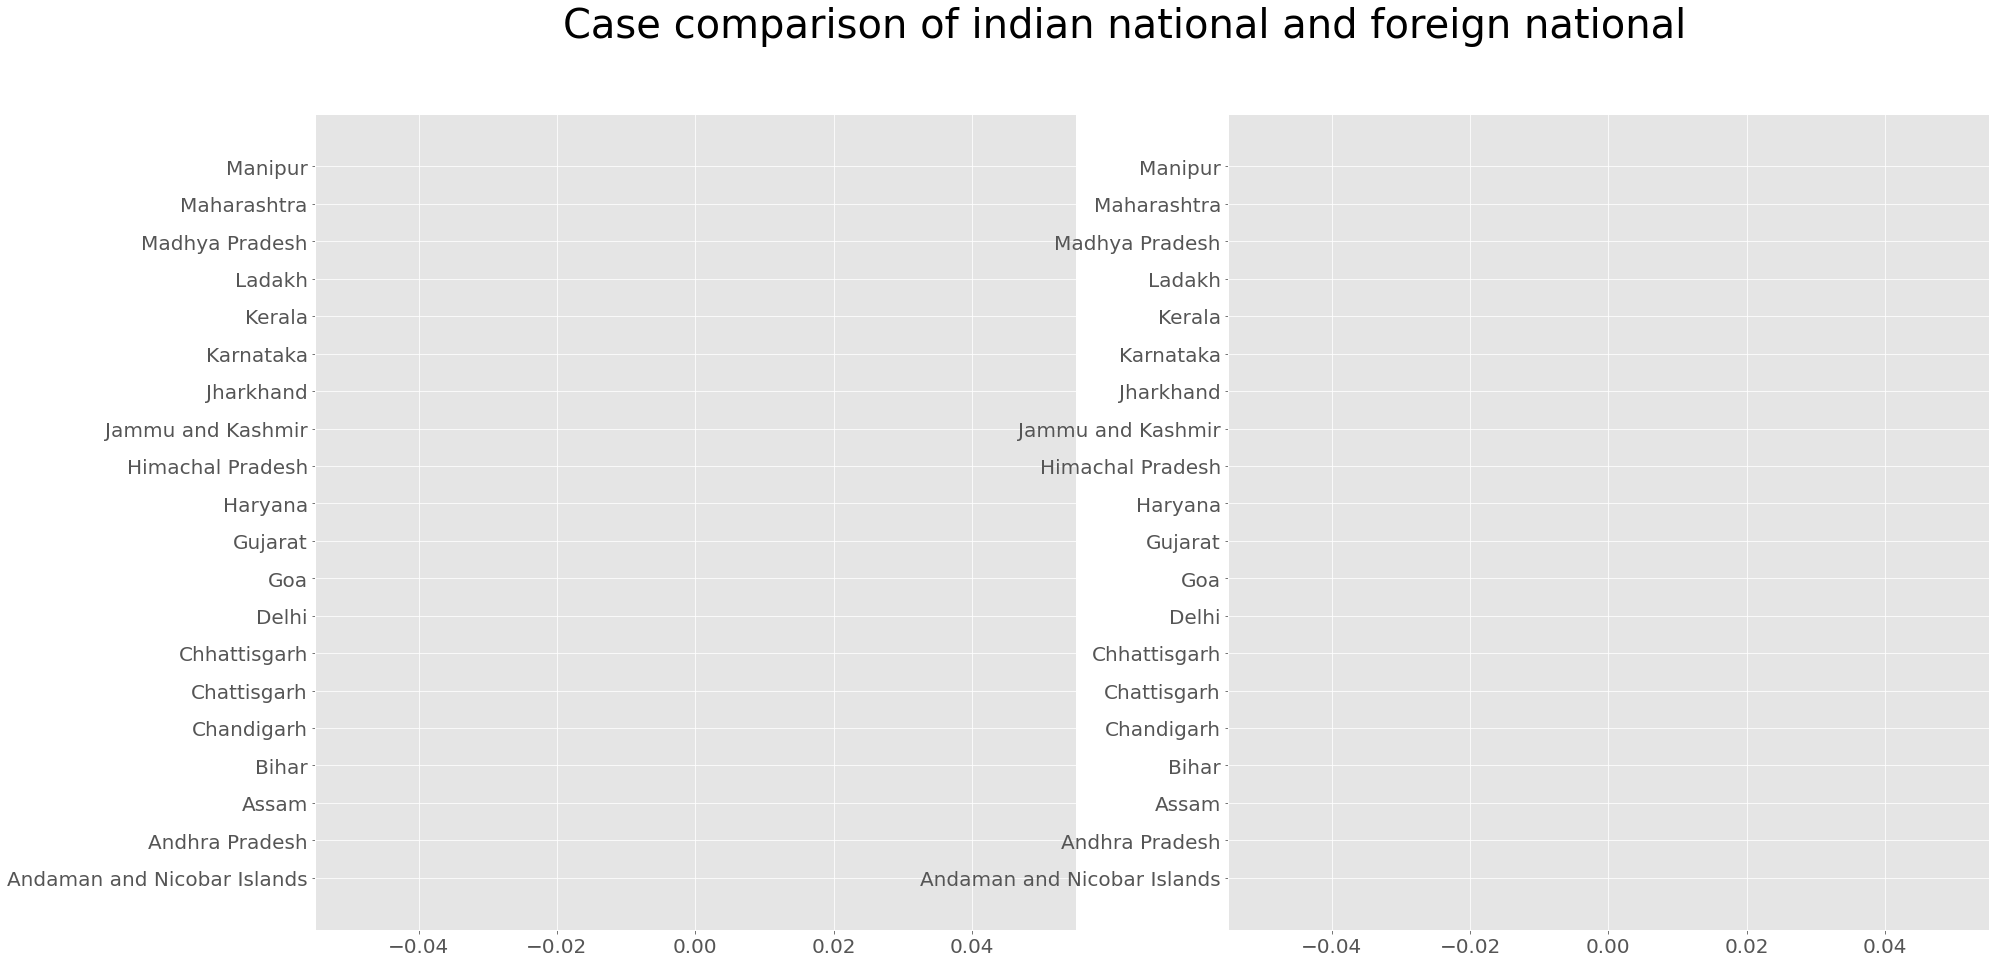

In [180]:
plt.figure(figsize=(30,15))
plt.suptitle('Case comparison of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(data4.index,data4.ConfirmedIndianNational,color='hotpink',linewidth=3)
plt.subplot(122)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(data5.index,data5.ConfirmedForeignNational,color='cyan',linewidth=3)

<BarContainer object of 20 artists>

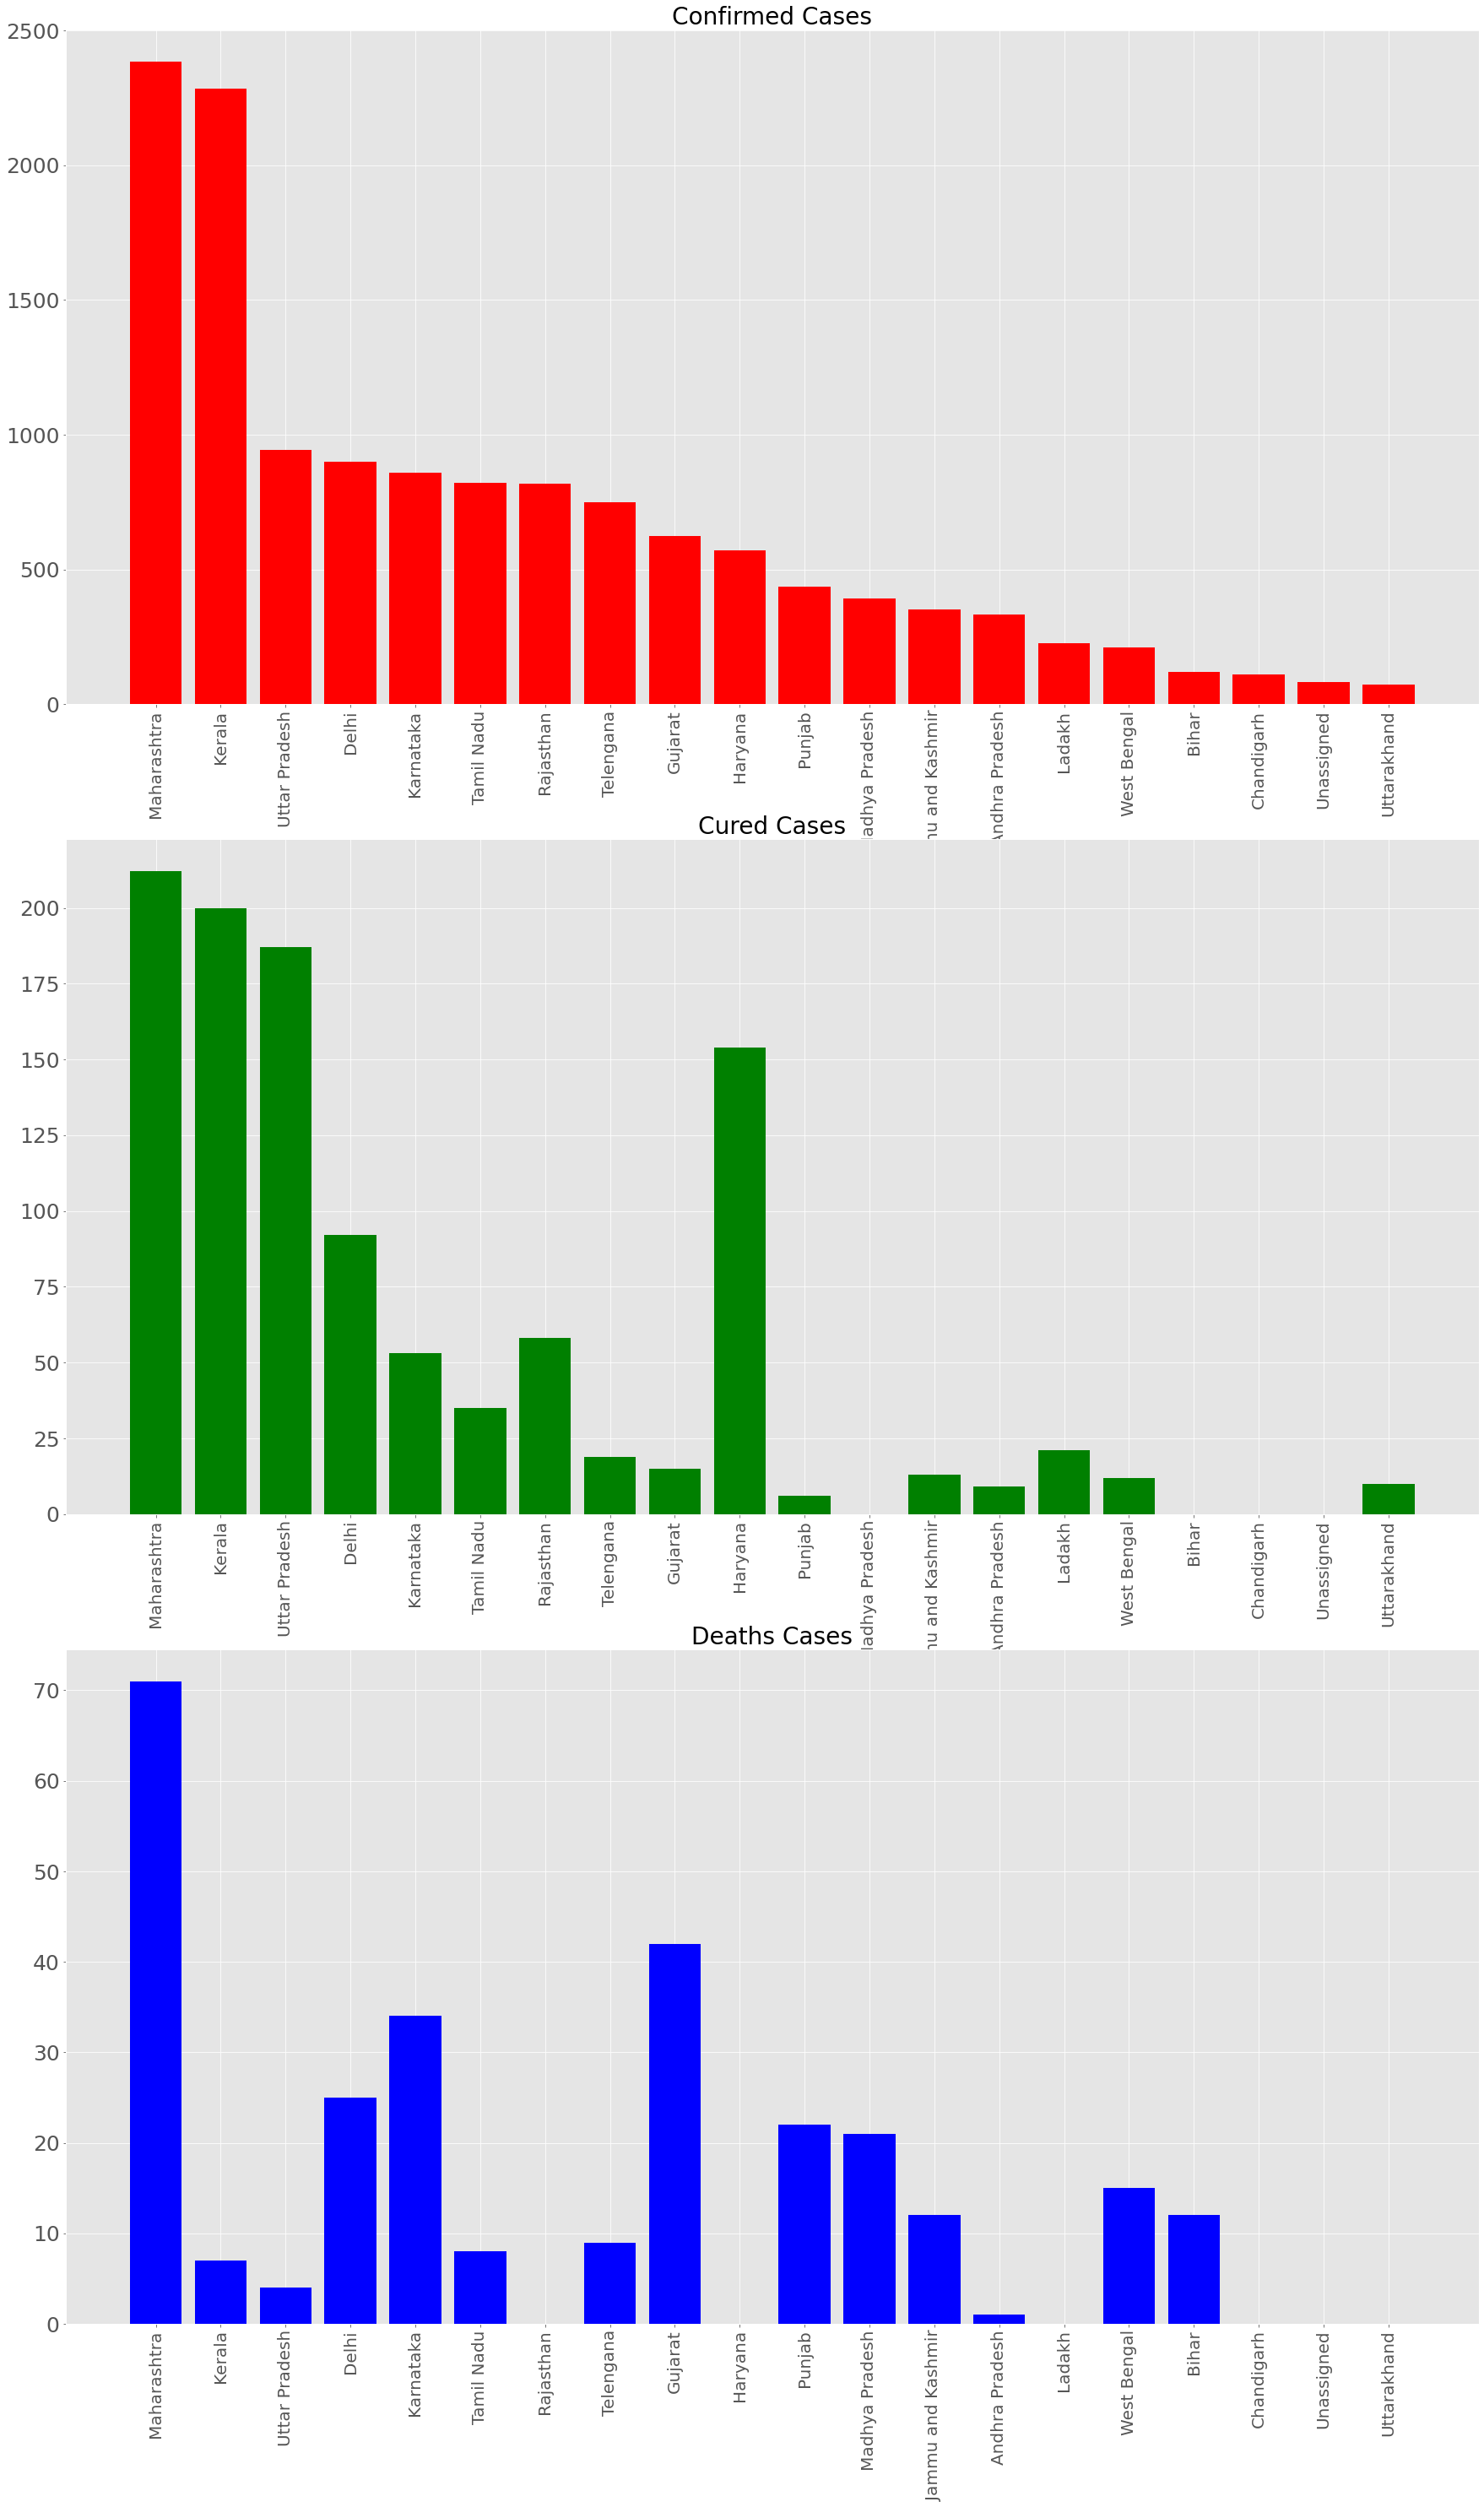

In [181]:
plt.figure(figsize=(30,50))
plt.subplot(311)
plt.title('Confirmed Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(data2.index,data2.Confirmed,color='red',linewidth=5)
plt.subplot(312)
plt.title('Cured Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(data2.index,data2.Cured,color='green',linewidth=5)
plt.subplot(313)
plt.title('Deaths Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(data2.index,data2.Deaths,color='blue',linewidth=5)

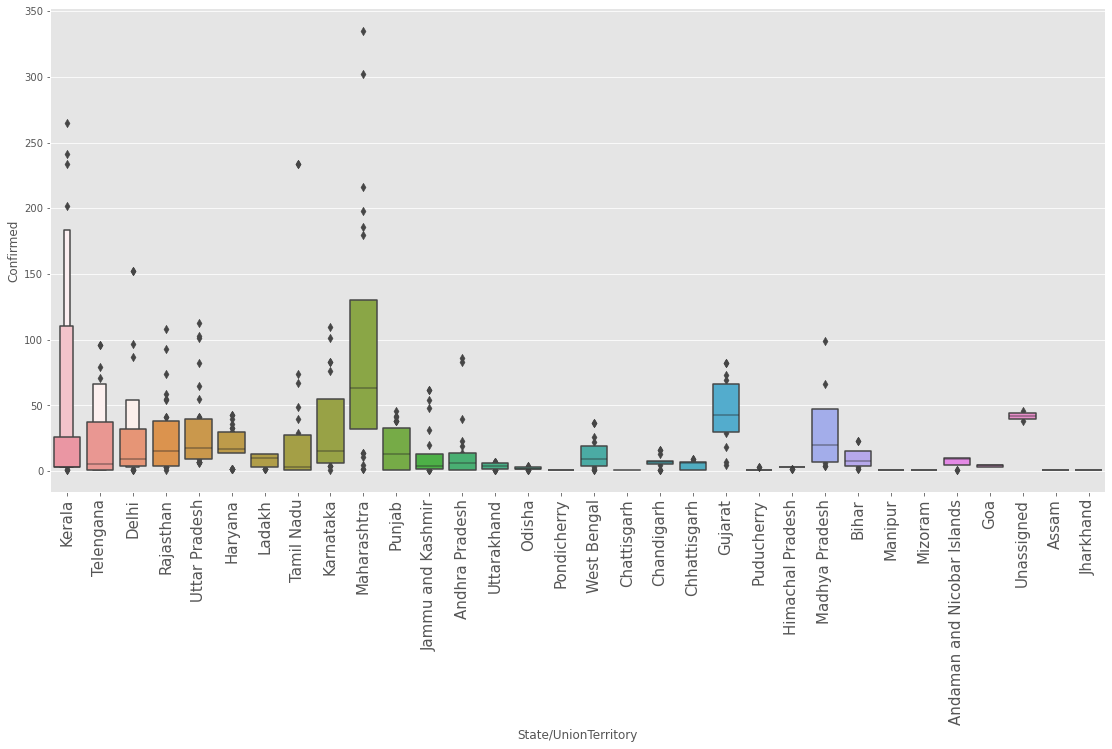

In [182]:
el=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=data)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

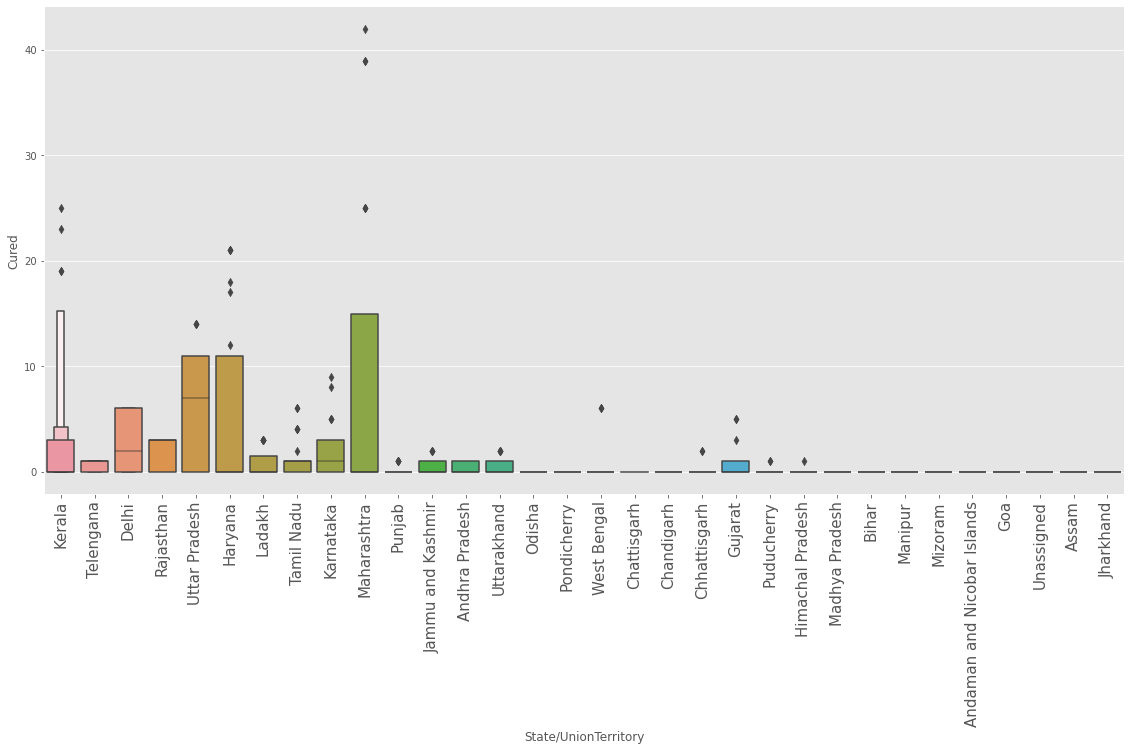

In [183]:
el=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=data)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

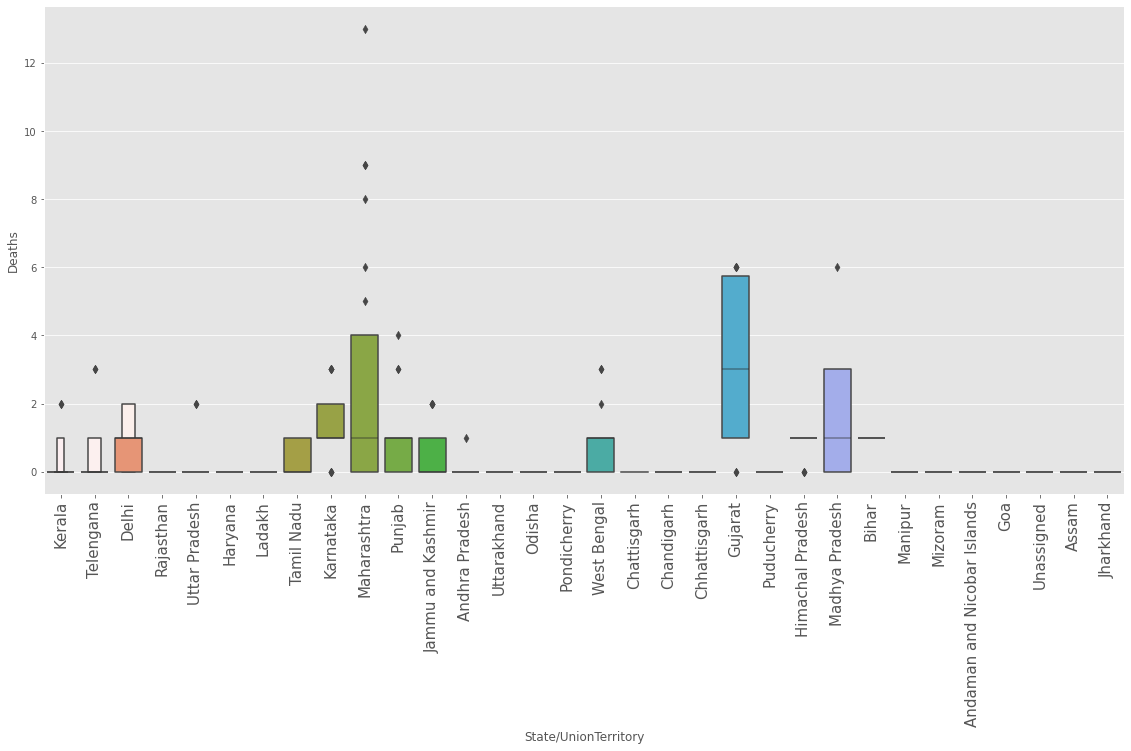

In [184]:
el=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=data)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

In [185]:
from sklearn.preprocessing import LabelEncoder # Label Encoding
lbl=LabelEncoder()
data['State/UnionTerritory']=lbl.fit_transform(data['State/UnionTerritory'])

In [186]:
data["ConfirmedForeignNational"]=data['ConfirmedForeignNational'].fillna(0,inplace=False) # filling '0' at null
data["ConfirmedIndianNational"]=data['ConfirmedIndianNational'].fillna(0,inplace=False) 

In [187]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [188]:
data['Date']=data['Date'].astype('datetime64[ns]')  

In [189]:
data['date']=data['Date'].dt.day
data['month']=data['Date'].dt.month

In [190]:
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date,month
0,1,2020-01-30,6:00 PM,15,0.0,0.0,0,0,1,30,1
1,2,2020-01-31,6:00 PM,15,0.0,0.0,0,0,1,31,1
2,3,2020-01-02,6:00 PM,15,0.0,0.0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,15,0.0,0.0,0,0,3,2,2
4,5,2020-03-02,6:00 PM,15,0.0,0.0,0,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...
582,583,2020-02-04,9:00 AM,26,0.0,0.0,6,1,234,4,2
583,584,2020-02-04,9:00 AM,27,0.0,0.0,1,3,96,4,2
584,585,2020-02-04,9:00 AM,30,0.0,0.0,2,0,7,4,2
585,586,2020-02-04,9:00 AM,29,0.0,0.0,14,2,113,4,2


# Model Selection

In [191]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [192]:
linear=LinearRegression()
logistic=LogisticRegression()
tree=DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


# Training/Testing Split (80:20)

In [193]:
from sklearn.model_selection import train_test_split
x=data[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=data['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [194]:
linear.fit(x_train,y_train)     # models fitting
logistic.fit(x_train,y_train)
tree.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Predictioons and Accuaracy calculation

In [195]:
from sklearn.metrics import r2_score
prediction=logistic.predict(x_test)   
score1=r2_score(y_test,prediction)

In [196]:
prediction

array([  3,  30,  41,   3, 202,   7,  55,   1,   1,  13,   1,   3,   3,
         3,   1,  24,  30,   3,   1,   1,   3,   1,   1,   1,  13,   3,
        24,   3,  36,   1,   1,   3,   3,   1,   3,   3,   3,   3,   3,
        36,   7, 113, 202,   3,   1,   1,  29,  38, 101,   1,   1,   3,
         3,   3,   1,   1,  26,   1,   1,   1,   1,   3,   1,  41,   1,
         1,   1,  55,  47,   1,   3,  30,   3,  36,   1,   1,  30,  13,
         1,   1,  17,   1,   1,   3,   3,   3,  36, 110,   1,   1, 101,
         3,   1,   1,  17, 202,   3,  41,  82,  41,   3,  30,   3,   1,
        13,   3,   1,   1,  47,   1,   1,   3,   3,   3,  13,   3,   3,
         1], dtype=int64)

In [197]:
prediction=linear.predict(x_test)
score2=r2_score(y_test,prediction)

In [198]:
prediction=tree.predict(x_test)
score3=r2_score(y_test,prediction)

In [199]:
prediction=rf.predict(x_test)
score4=r2_score(y_test,prediction)

# Models's accuracy comparision

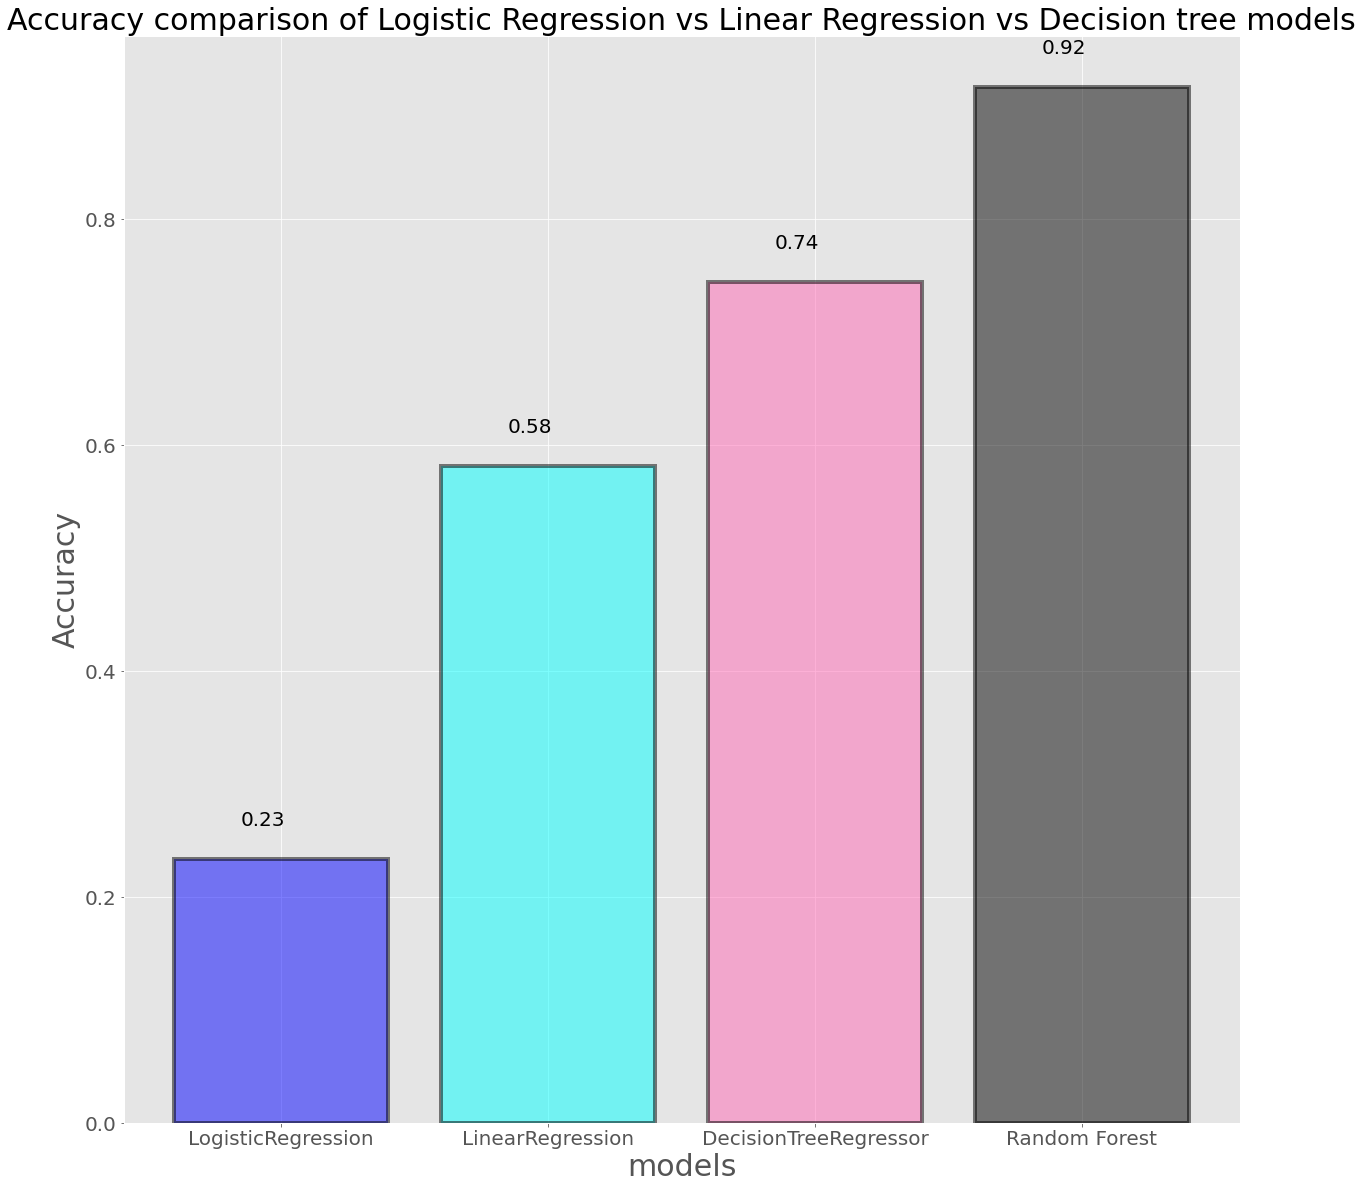

In [200]:
scores=[score1,score2,score3,score4]
models=['LogisticRegression','LinearRegression','DecisionTreeRegressor','Random Forest']
plt.figure(figsize=(20,20))
plt.title('Accuracy comparison of Logistic Regression vs Linear Regression vs Decision tree models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['blue','cyan','hotpink','black'],alpha=0.5,linewidth=4,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=20)